In [3]:
# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


c:\Users\kenny\anaconda3\envs\Pandas\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kenny\anaconda3\envs\Pandas\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kenny\anaconda3\envs\Pandas\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kenny\anaconda3\envs\Pandas\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

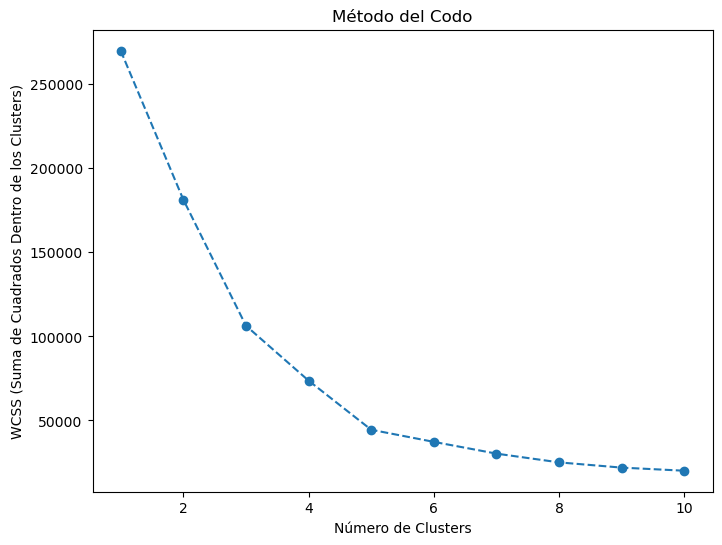

In [4]:
# Cargar el conjunto de datos "Mall Customers"
data = pd.read_csv('./Mall_Customers.csv')
# Mostrar las primeras filas del conjunto de datos
print(data.head())
# Seleccionar las características relevantes para el clustering
X = data.iloc[:, [3, 4]].values  # Estamos usando 'Annual Income' y 'Spending Score'
# Encontrar el número óptimo de clusters usando el método del codo (Elbow Method)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Graficar el método del codo para determinar el número óptimo de clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS (Suma de Cuadrados Dentro de los Clusters)')
plt.show()

c:\Users\kenny\anaconda3\envs\Pandas\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


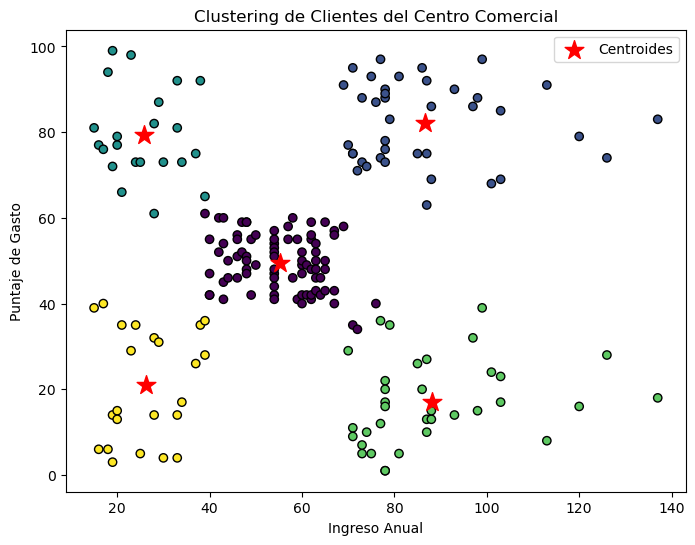

In [5]:
# Aplicar K-Means con el número óptimo de clusters (determinado visualmente)
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=42)
kmeans.fit(X)

# Visualizar los clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], marker='*', s=200, c='red', label='Centroides')

plt.title('Clustering de Clientes del Centro Comercial')
plt.xlabel('Ingreso Anual')
plt.ylabel('Puntaje de Gasto')
plt.legend()
plt.show()